In [54]:
import pandas as pd
import numpy as np
import pyreadstat as ps

In [11]:
df, meta = ps.read_sav("D:/KOMSTAT/Pert2/komstat1.sav")

In [193]:
df.head(10)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Evan N'Dicka,Centre-Back,18.0,AJ Auxerre,Ligue 2,E. Frankfurt,1.Bundesliga,2018-2019,400000.0,5000000.0
1,Federico Valietti,Right-Back,19.0,Inter,Serie A,Genoa,Serie A,2018-2019,500000.0,7500000.0
2,Giangiacomo Magnani,Centre-Back,22.0,Juventus,Serie A,Sassuolo,Serie A,2018-2019,600000.0,5000000.0
3,Giangiacomo Magnani,Centre-Back,22.0,Perugia,Serie B,Juventus,Serie A,2018-2019,600000.0,5000000.0
4,Jonathan Ikoné,Attacking Midfield,20.0,Paris SG,Ligue 1,LOSC Lille,Ligue 1,2018-2019,700000.0,5000000.0
5,Alphonso Davies,Left Winger,18.0,Vancouver,Canada,Bayern Munich,1.Bundesliga,2018-2019,800000.0,10000000.0
6,Jens Odgaard,Centre-Forward,19.0,Inter,Serie A,Sassuolo,Serie A,2018-2019,800000.0,5000000.0
7,Marco Carraro,Defensive Midfield,20.0,Inter,Serie A,Atalanta,Serie A,2018-2019,800000.0,5000000.0
8,Marco Tumminello,Centre-Forward,19.0,AS Roma,Serie A,Atalanta,Serie A,2018-2019,1000000.0,5000000.0
9,Bremer,Centre-Back,21.0,Atlético-MG,Série A,Torino,Serie A,2018-2019,1000000.0,5800000.0


In [15]:
df.shape

(242, 10)

In [70]:
df.columns

Index(['Name', 'Position', 'Age', 'Team_from', 'League_from', 'Team_to',
       'League_to', 'Season', 'Market_value', 'Transfer_fee'],
      dtype='object')

In [117]:
df.dtypes

Name             object
Position         object
Age             float64
Team_from        object
League_from      object
Team_to          object
League_to        object
Season           object
Market_value    float64
Transfer_fee    float64
dtype: object

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 10 columns):
Name            242 non-null object
Position        242 non-null object
Age             242 non-null float64
Team_from       242 non-null object
League_from     242 non-null object
Team_to         242 non-null object
League_to       242 non-null object
Season          242 non-null object
Market_value    242 non-null float64
Transfer_fee    242 non-null float64
dtypes: float64(3), object(7)
memory usage: 19.0+ KB


In [121]:
df.isna().sum()

Name            0
Position        0
Age             0
Team_from       0
League_from     0
Team_to         0
League_to       0
Season          0
Market_value    0
Transfer_fee    0
dtype: int64

In [49]:
df[df["Name"].duplicated(keep=False)]

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
2,Giangiacomo Magnani,Centre-Back,22.0,Juventus,Serie A,Sassuolo,Serie A,2018-2019,600000.0,5000000.0
3,Giangiacomo Magnani,Centre-Back,22.0,Perugia,Serie B,Juventus,Serie A,2018-2019,600000.0,5000000.0
34,Roger Martínez,Centre-Forward,24.0,JS Suning,Super League,Villarreal CF,LaLiga,2018-2019,2500000.0,14900000.0
35,Roger Martínez,Centre-Forward,24.0,Villarreal CF,LaLiga,América,Liga MX Apertura,2018-2019,2500000.0,8500000.0
156,Mikel Merino,Defensive Midfield,22.0,Newcastle,Premier League,Real Sociedad,LaLiga,2018-2019,10000000.0,12000000.0
157,Mikel Merino,Defensive Midfield,22.0,Bor. Dortmund,1.Bundesliga,Newcastle,Premier League,2018-2019,10000000.0,7000000.0
162,Benik Afobe,Centre-Forward,25.0,Wolves,Premier League,Stoke City,Championship,2018-2019,10000000.0,13500000.0
163,Benik Afobe,Centre-Forward,25.0,Bournemouth,Premier League,Wolves,Premier League,2018-2019,10000000.0,11400000.0


In [64]:
df.describe()

,Age,Market_value,Transfer_fee
count,242.000000,2.420000e+02,2.420000e+02
mean,24.223140,1.143595e+07,1.412054e+07
std,3.280744,1.452763e+07,1.545322e+07
min,16.000000,4.000000e+05,4.500000e+06
25%,22.000000,3.500000e+06,6.000000e+06
50%,24.000000,7.000000e+06,9.000000e+06
75%,26.000000,1.400000e+07,1.500000e+07
max,33.000000,1.200000e+08,1.350000e+08


In [71]:
df.groupby('Position').aggregate(['min', np.median,np.mean, max])

Age                         Market_value              \
                     min median       mean   max          min      median   
Position                                                                    
Attacking Midfield  20.0   25.0  24.882353  30.0     700000.0   6000000.0   
Central Midfield    19.0   23.0  24.096774  31.0    1500000.0   8000000.0   
Centre-Back         18.0   25.0  24.628571  30.0     400000.0   7500000.0   
Centre-Forward      19.0   25.0  24.620000  33.0     800000.0   4000000.0   
Defensive Midfield  20.0   24.0  24.000000  30.0     800000.0   8000000.0   
Goalkeeper          19.0   25.0  25.285714  33.0    2000000.0   4500000.0   
Left Midfield       25.0   25.0  25.000000  25.0   10000000.0  10000000.0   
Left Winger         16.0   22.0  22.380952  31.0     800000.0   7000000.0   
Left-Back           20.0   24.0  23.882353  28.0    1750000.0   4500000.0   
Right Midfield      23.0   23.0  23.000000  23.0   10000000.0  10000000.0   
Right Winger        19.0   25.0  24.611111  30.0    2500000.0  16000000.0   
Right-Back          19.0   22.5  22.357143  26.0     500000.0  11000000.0   
Second Striker      24.0   27.0  27.250000  31.0    4500000.0   6250000.0   

                                              Transfer_fee              \
                            mean          max          min      median   
Position                                                                 
Attacking Midfield  7.094118e+06   15000000.0    4800000.0   9000000.0   
Central Midfield    1.472581e+07   65000000.0    4800000.0   8000000.0   
Centre-Back         8.311429e+06   25000000.0    4500000.0   8000000.0   
Centre-Forward      8.683000e+06  100000000.0    5000000.0   9000000.0   
Defensive Midfield  1.383158e+07   50000000.0    5000000.0  10000000.0   
Goalkeeper          1.135714e+07   60000000.0    6000000.0   8750000.0   
Left Midfield       1.000000e+07   10000000.0    7500000.0   7500000.0   
Left Winger         1.227619e+07   65000000.0    5150000.0  10000000.0   
Left-Back           7.308824e+06   18000000.0    5000000.0   9500000.0   
Right Midfield      1.000000e+07   10000000.0    5000000.0   5000000.0   
Right Winger        2.433333e+07  120000000.0    5000000.0  13850000.0   
Right-Back          1.275000e+07   35000000.0    4500000.0  10000000.0   
Second Striker      6.250000e+06    8000000.0    4500000.0   5600000.0   

                                               
                            mean          max  
Position                                       
Attacking Midfield  1.080294e+07   25000000.0  
Central Midfield    1.591129e+07   60000000.0  
Centre-Back         1.073714e+07   35900000.0  
Centre-Forward      1.260860e+07  117000000.0  
Defensive Midfield  1.587895e+07   57000000.0  
Goalkeeper          1.497500e+07   62500000.0  
Left Midfield       7.500000e+06    7500000.0  
Left Winger         1.640238e+07   70000000.0  
Left-Back           1.004118e+07   24000000.0  
Right Midfield      5.000000e+06    5000000.0  
Right Winger        2.613556e+07  135000000.0  
Right-Back          1.420714e+07   40400000.0  
Second Striker      6.425000e+06   10000000.0

In [189]:
df[df.Market_value == df.Market_value.max()]

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
241,Kylian Mbappé,Right Winger,19.0,Monaco,Ligue 1,Paris SG,Ligue 1,2018-2019,120000000.0,135000000.0


In [190]:
df[df.Market_value == df.Market_value.min()]

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Evan N'Dicka,Centre-Back,18.0,AJ Auxerre,Ligue 2,E. Frankfurt,1.Bundesliga,2018-2019,400000.0,5000000.0


In [191]:
df[df.Age == df.Age.max()]

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
99,Lukasz Fabianski,Goalkeeper,33.0,Swansea,Championship,West Ham,Premier League,2018-2019,5000000.0,8000000.0
240,Cristiano Ronaldo,Centre-Forward,33.0,Real Madrid,LaLiga,Juventus,Serie A,2018-2019,100000000.0,117000000.0


In [192]:
df[df.Age == df.Age.min()]

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
102,Willem Geubbels,Left Winger,16.0,Olympique Lyon,Ligue 1,Monaco,Ligue 1,2018-2019,6000000.0,20000000.0


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [85]:
df["Position"].value_counts()

Centre-Forward        50
Centre-Back           35
Central Midfield      31
Left Winger           21
Defensive Midfield    19
Right Winger          18
Attacking Midfield    17
Left-Back             17
Goalkeeper            14
Right-Back            14
Second Striker         4
Right Midfield         1
Left Midfield          1
Name: Position, dtype: int64

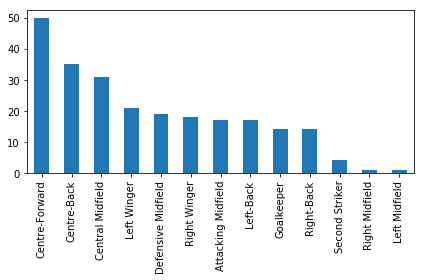

In [107]:
df['Position'].value_counts().plot.bar()
plt.tight_layout()


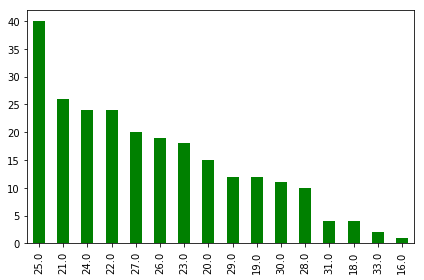

In [125]:
df['Age'].value_counts().plot.bar(color='g')
plt.tight_layout()
plt.show()

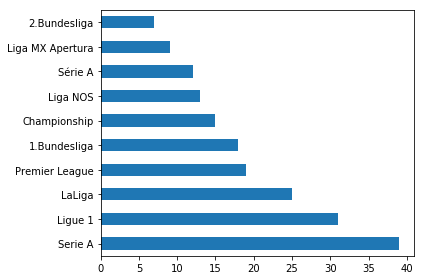

In [178]:
df["League_from" ].value_counts().head(10).plot.barh()
plt.tight_layout()
plt.show()

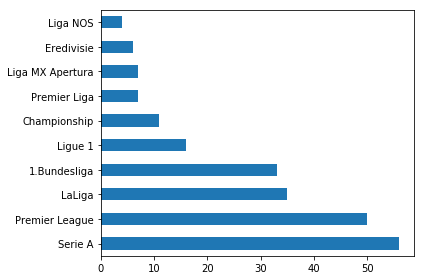

In [173]:
df["League_to"].value_counts().head(10).plot.barh()
plt.tight_layout()
plt.show()